
## Iris Data Set - Project 2019                                  
### Programing and Scripting 
### GMIT Galway
Slawomir Sowa
12/04/2019

### Subject

Project concern Fisher’s Iris data set. 

1. Research background information about the data set and write a summary about it.
2. Keep a list of references you used in completing the project.
3. Download the data set and write some Python code to investigate it.
4. Summarise the data set by, for example, calculating the maximum, minimum and mean of each column of the data set. A Python script will quickly do this for you.
5. Write a summary of your investigations.
6. Include supporting tables and graphics as you deem necessary.






### Technology

To analyse Iris Data Set I work with Python 3.7 and Jupyter Notebook.  

<img width='400px' align='left' src='https://www.python.org/static/community_logos/python-logo-master-v3-TM.png'>

<img width='150px' align='left' src='https://jupyter.org/assets/main-logo.svg'>



### Fisher's Iris Data Set
(history information about data-set to insert here)

### Getting Data

Iris Data Set downloaded from [www.kaggle.com](https://www.kaggle.com/saurabh00007/iriscsv)


To read data from `iris.csv` file I used `pandas` library and `read_csv` function. Variable `data` is my data frame. `data.shape` describes how many rows and columns is in data set. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

data = pd.read_csv('Iris.csv') 
data.shape

(150, 6)

Iris Data set has 150 rows and 6 columns.

`data.head(5)` allow mi to print first 5 rows of data set.

In [2]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Our data set contains 6 columns: `ID`, `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm` and `Species`. 

Firstly I explaine what Sepal and Petal Length are. 
<img width='400px' src='http://suruchifialoke.com/img/icon_iris.png'>

Sepal is longer and Petal is shorther part of iris flower. All Sepal and Petal lengths are measured in cm.  

In [3]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


`data.tail(5)` function gives me last 5 rows taken from data set. As we see there is 150 rows. `ID` column enumerate all rows. 

Interesting things noticed in `species` column. We started with `iris-setosa` and finished with `iris-virginica`. Lets check how many different species we have in data set. 

In [4]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

By using `value_counts()` function on my data frame `data` I found 3 unique values in `Spacies` column:`Iris-setosa`, `Iris-virginica` and `Iris-versicolor` and each type occurs 50 times.    

Is worth to check is any data missing in iris data set. To do that I used `isnull()` function from `pandas` library. Function returns boolean value `True` if `null` value exists and `False` if `not null` value founded. 

In [5]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

No missing data founded. <br>
Let's examine data types of each column. To do that I used `dtypes` object from `pandas` library.   

In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Returned result shows that all data types are correct. In case, if we get multiple data types in single column `dtypes` return `object` data type. For columne `SepalLengthCm` we expecting to get `int` or `float` data type. Column `Species` contains `string`data type, in `pandas` it's called `object` data type.    

Let's separate species. Firstly I have to retrive iris-setosa species from data set and save it in to separate data frame `dfSetosa`. `data[data['Species'] == 'Iris-setosa']` statement compare each row in column `Species` with `Iris-setosa` object. If the same, then row is added to `dfSetosa` data frame. I take the same steps for `Iris-virginica` and `Iris-versicolor`.

In [7]:
dfSetosa = data[data['Species'] == 'Iris-setosa']
dfVirginica = data[data['Species'] == 'Iris-virginica']
dfversicolor = data[data['Species'] == 'Iris-versicolor']

## Iris-setosa Analyse

Now let's take a closer look on Iris-setosa type.  

In [8]:
dfSetosa['Species'].value_counts()

Iris-setosa    50
Name: Species, dtype: int64

`dfSetosa['Species'].value_counts()` shows that new dataframe has 50 rows and contains only Iris-Setosa type. 
Now I calucate max, min, mean and standard deviation value for Sepal and Petal length and width by using `descibe()`function, which return table.

In [9]:
dfSetosa = dfSetosa.drop(['Id'], axis = 1)
dfSetosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


To get better view i decided to drop `Id` column by using `DataFrame.drop()` function.<br>
I got values formated in Table and as we can see from `mean`that Sepal is longer and wider than Petal for Iris Setosa Flower type.    

Scatter plot shows low positive corelation between Sepal Lenghth and Sepal Width. 

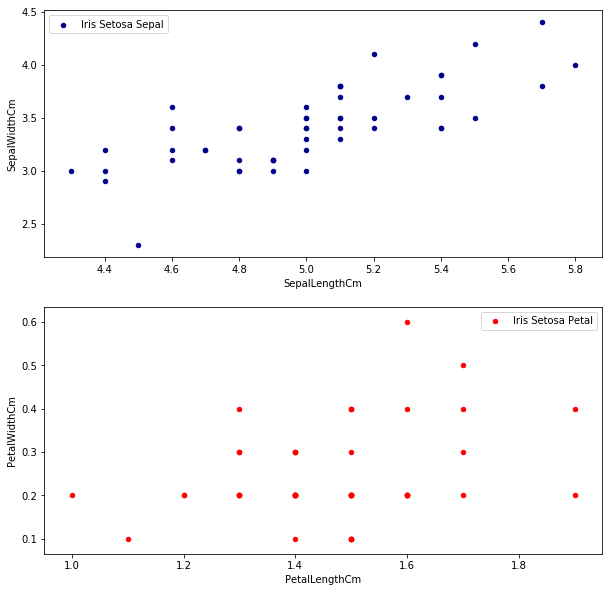

In [10]:
fig, ax = plt.subplots(2,1, figsize=(10, 10))

dfSetosa.plot(
    kind='scatter', 
    x='SepalLengthCm', 
    y='SepalWidthCm', 
    color='DarkBlue',
    ax=ax[0], 
    label='Iris Setosa Sepal',
    figsize=(10,10))

dfSetosa.plot(
    kind='scatter', 
    x='PetalLengthCm', 
    y='PetalWidthCm', 
    color='red',
    ax=ax[1], 
    label='Iris Setosa Petal',
    figsize=(10,10))

### Frequency Charts 
Frequency charts shows the number of instances data values appear within a dataset. To plot I used `Matplotlib` and `Pandas` library.

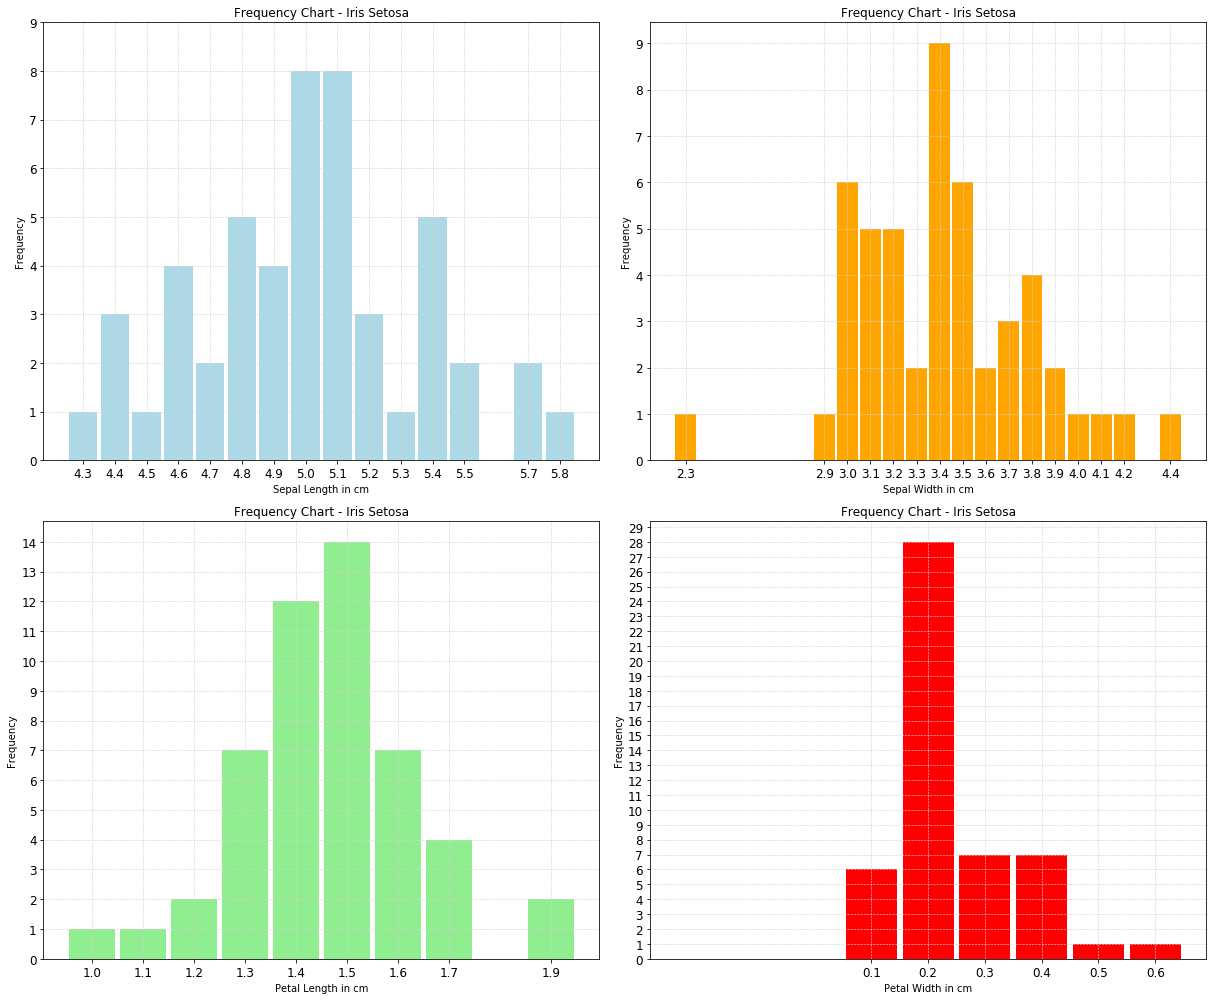

In [11]:
plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# ax - tell us where is plot, bins to find out, rwidth - bin width, 
dfSetosa['SepalLengthCm'].plot(
    kind='hist', # what kind of plot: linear, histogram, pie, scatter etc. 
    bins=np.arange(4.25,5.9,0.1), # set bin edges, 
    rwidth=0.9, # width of bin
    ax=ax[0][0], # shows where to plot   
    xticks=pd.unique(dfSetosa['SepalLengthCm']), # set ticks on x axis, as unique values from SepalLengthCm column 
    color='lightblue', # color of histogram
    grid=True, # set grid as True
    yticks=np.arange(0,10,1), # set ticks on y axis in range from 0 to 10 with step 1
    fontsize=12) # set font size for ticks on x and y axis

dfSetosa['SepalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(2.25,4.5,0.1), 
    rwidth=0.9, 
    ax=ax[0][1],
    xticks=pd.unique(dfSetosa['SepalWidthCm']),
    color='orange',
    grid=True,
    yticks=np.arange(0,10,1),
    fontsize=12)


dfSetosa['PetalLengthCm'].plot(
    kind='hist', 
    bins=np.arange(0.95,2.0,0.1), 
    rwidth=0.9, 
    ax=ax[1][0], 
    xticks=pd.unique(dfSetosa['PetalLengthCm']),
    color='lightgreen',
    grid=True,
    yticks=np.arange(0,15,1),
    fontsize=12)

dfSetosa['PetalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(-0.25,0.7,0.1), 
    rwidth=0.9, 
    ax=ax[1][1],
    xticks=pd.unique(dfSetosa['PetalWidthCm']), 
    color='red',
    grid=(True),
    yticks=np.arange(0,30,1),
    fontsize=12)

# set title and axis labels
ax[0][0].set(title='Frequency Chart - Iris Setosa', xlabel = 'Sepal Length in cm' )
ax[0][1].set(title='Frequency Chart - Iris Setosa', xlabel = 'Sepal Width in cm')
ax[1][0].set(title='Frequency Chart - Iris Setosa', xlabel = 'Petal Length in cm')
ax[1][1].set(title='Frequency Chart - Iris Setosa', xlabel = 'Petal Width in cm' )

# set grid color, line style and line width
ax[0][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[0][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)

plt.tight_layout()
plt.show()

### Cross Tables 
Lets find out what Frequency Percentage Distribution for Iris Setosa, <br>
To calcucate percentage i use `crosstab()`function from `Pandas` libreary. 

In [12]:
# comments to add
crossTable = pd.crosstab(index=dfSetosa['SepalLengthCm'], columns = 'count', )

# s_counts holds number of all values in table. We 
#s_counts=np.sum(s_counts)
sepalLengthNo, sepalWidthNo,petalLengthNo, petalWidthNo, speciesNo = dfSetosa.count()

#For better wiev I transpose table 
crossTable = crossTable.T

# statement below add new row 'Percent' with calculated field 
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalLengthNo)*100

crossTable

SepalLengthCm,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.7,5.8
col_0,,,,,,,,,,,,,,,
count,1.0,3.0,1.0,4.0,2.0,5.0,4.0,8.0,8.0,3.0,1.0,5.0,2.0,2.0,1.0
Percent [%],2.0,6.0,2.0,8.0,4.0,10.0,8.0,16.0,16.0,6.0,2.0,10.0,4.0,4.0,2.0


Cross Table shows that `32%` of overall Iris Setosa Sepal Lengths belongs to `5.1` and `5.2` length. 

In [13]:
crossTable = pd.crosstab(index=dfSetosa['SepalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalWidthNo)
crossTable

SepalWidthCm,2.3,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
col_0,,,,,,,,,,,,,,,,
count,1.00,1.00,6.00,5.0,5.0,2.00,9.00,6.00,2.00,3.00,4.00,2.00,1.00,1.00,1.00,1.00
Percent [%],0.02,0.02,0.12,0.1,0.1,0.04,0.18,0.12,0.04,0.06,0.08,0.04,0.02,0.02,0.02,0.02


`18%` of overall Iris Setosa Sepal Width belongs to `3.4` cm width

In [14]:
crossTable = pd.crosstab(index=dfSetosa['PetalLengthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalLengthNo)
crossTable

PetalLengthCm,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9
col_0,,,,,,,,,
count,1.00,1.00,2.00,7.00,12.00,14.00,7.00,4.00,2.00
Percent [%],0.02,0.02,0.04,0.14,0.24,0.28,0.14,0.08,0.04


`52%` of overall Iris Setosa Petal Length belongs to `1.4` and `1.5` cm length.

In [15]:
crossTable = pd.crosstab(index=dfSetosa['PetalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalWidthNo)
crossTable

PetalWidthCm,0.1,0.2,0.3,0.4,0.5,0.6
col_0,,,,,,
count,6.00,28.00,7.00,7.00,1.00,1.00
Percent [%],0.12,0.56,0.14,0.14,0.02,0.02


`56%` of overall Iris Setosa Petal Width belongs to `0.2` cm width.

#### Precision of a Set of Measurement

A data set of repetitive measurements is often expressed as a single representative number called the mean or average and it is a sum of individual measurements ($x_i$) devided by the number of measurements ($N$)

$$ \bar x  = \frac{\sum X_i}{N} $$

  
    
Deviation from the mean is the difference between the individual experimental value and the mean value. Calculated as:

$$ (x_i - \bar x) $$

    
Estimated standard deviation ($s$) from sample of population is a number used to tell how measurements for a group are spread out from the average or expected value. A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out.

$$ s = \sqrt { \frac {\sum (x_i - \bar x)^2}{N-1} } $$

Because we take a sample of population (selection taken from a bigger population of iris flowers), the number of degrees of freedom ($N−1$) is the total number of measurements minus one, called "Bessel's correction".

Lets calculate mean and standard deviation for Iris Setosa sepal length and width:

In [16]:
print('Iris Setosa Sepal Length mean =', np.round(dfSetosa['SepalLengthCm'].mean(),decimals=1)) 
print('Iris Setosa Sepal Length Standard Deviations =',np.round(dfSetosa['SepalLengthCm'].std(),decimals=1))
print()
print('Iris Setosa Sepal Width mean =',np.round(dfSetosa['SepalWidthCm'].mean(),decimals=1))
print('Iris Setosa Sepal Width Standard Deviations =',np.round(dfSetosa['SepalWidthCm'].std(),decimals=1))


Iris Setosa Sepal Length mean = 5.0
Iris Setosa Sepal Length Standard Deviations = 0.4

Iris Setosa Sepal Width mean = 3.4
Iris Setosa Sepal Width Standard Deviations = 0.4


To sumarise:
Standard dimensions of Iris setosa sepal

$$sepal length  = 5.0 \pm 0.4 cm $$
$$sepal width  = 3.4 \pm 0.4 cm$$
    


Boxplot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers.

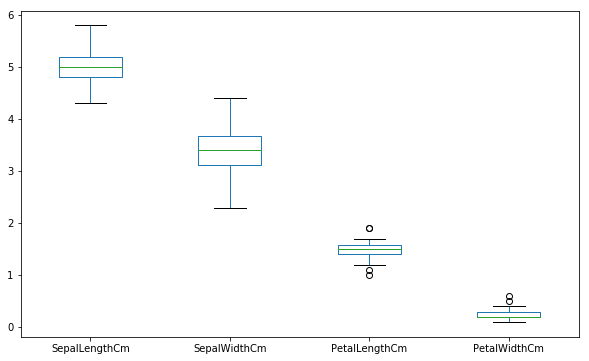

In [17]:
dfSetosa.plot(kind='box', figsize=(10,6))

#### Frequency Charts and Cross Tables summary:

32% of Iris Setosa Sepal length have `5.0 cm` and `5.1 cm`. In range between `4.3 cm` and `5.8 cm` and average `5.00600 cm`. Standard deviation from average `0.35249`  


and Sepal Width  are most common values.
From Petal Length and Petal Width charts we can read that `1.4` and `1.5` are most common Petal Lengths and `0.2` Petal Width. 

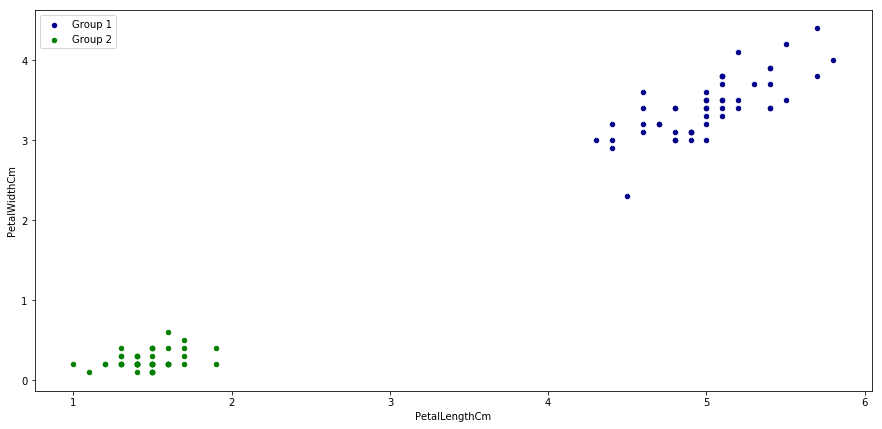

In [18]:

ax = dfSetosa.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='DarkBlue', label='Group 1',figsize=(15,7))

dfSetosa.plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Group 2', ax = ax)

In [19]:
np.std([1,2.3])

0.6499999999999999

References 
https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe

Iris Data set downloaded From
https://www.kaggle.com/saurabh00007/iriscsv

!!! Fishers Notebook !!!
http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf
http://patrickhoey.com/downloads/Computer_Science/03_Patrick_Hoey_Data_Visualization_Dataset_paper.pdf


styles in pandas and seaborn
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

iris flower image 
https://www.snaplogic.com/machine-learning-showcase/iris-flower-classification

Pandas 
https://stackoverflow.com/a/33742822/11107506

Charts
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Set chart
https://stackoverflow.com/a/45080859/11107506

more charts 
https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

more charts
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

check is null in data frame
https://stackoverflow.com/a/29530559/11107506

corss table 
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html

https://pbpython.com/pandas-crosstab.html

font size 
https://stackoverflow.com/a/12444777/11107506

University of California, Irvine - Error Analysis
http://faculty.sites.uci.edu/chem2l/files/2011/04/RDGerroranal.pdf